## Importing libraries

- Importing important libraries such as numpy, pandas, matplotli etc.

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
import warnings
warnings.filterwarnings('ignore')

## Reading dataset

- Changing datatype of 'Date' coloumn from string to Date type
- Resetting Index

In [2]:
power=pd.read_csv("energygen.csv",parse_dates=['Date'])
state_region=pd.read_csv('State_Region_corrected.csv')

In [3]:
power.head()

,index,Date,Region,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU)
0,0,2017-09-01,Northern,624.23,484.21,30.36,35.57,273.27,320.81
1,1,2017-09-01,Western,"1,106.89","1,024.33",25.17,3.81,72.00,21.53
2,2,2017-09-01,Southern,576.66,578.55,62.73,49.80,111.57,64.78
3,3,2017-09-01,Eastern,441.02,429.39,NaN,NaN,85.94,69.36
4,4,2017-09-01,NorthEastern,29.11,15.91,NaN,NaN,24.64,21.21


In [4]:
power=power.set_index('index')

In [5]:
power.head()

,Date,Region,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU)
index,,,,,,,,
0,2017-09-01,Northern,624.23,484.21,30.36,35.57,273.27,320.81
1,2017-09-01,Western,"1,106.89","1,024.33",25.17,3.81,72.00,21.53
2,2017-09-01,Southern,576.66,578.55,62.73,49.80,111.57,64.78
3,2017-09-01,Eastern,441.02,429.39,NaN,NaN,85.94,69.36
4,2017-09-01,NorthEastern,29.11,15.91,NaN,NaN,24.64,21.21


## Exploratory Data Analysis

- Extracting basic information about the dataset 

In [6]:
power.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4945 entries, 0 to 309
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Date                                  4945 non-null   datetime64[ns]
 1   Region                                4945 non-null   object        
 2   Thermal Generation Actual (in MU)     4945 non-null   object        
 3   Thermal Generation Estimated (in MU)  4945 non-null   object        
 4   Nuclear Generation Actual (in MU)     2967 non-null   float64       
 5   Nuclear Generation Estimated (in MU)  2967 non-null   float64       
 6   Hydro Generation Actual (in MU)       4945 non-null   float64       
 7   Hydro Generation Estimated (in MU)    4945 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 289.7+ KB


- Since 'Thermal Generation Actual (in MU)' and 'Thermal Generation Estimated (in MU)' are float values but cosidered as object by default (due to presence of commas[,])  these have to be changed to float datatypes

In [7]:
power['Thermal Generation Actual (in MU)'] = power['Thermal Generation Actual (in MU)'].str.replace(',','').astype('float')
power['Thermal Generation Estimated (in MU)'] = power['Thermal Generation Estimated (in MU)'].str.replace(',','').astype('float')

In [8]:
power.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4945 entries, 0 to 309
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Date                                  4945 non-null   datetime64[ns]
 1   Region                                4945 non-null   object        
 2   Thermal Generation Actual (in MU)     4945 non-null   float64       
 3   Thermal Generation Estimated (in MU)  4945 non-null   float64       
 4   Nuclear Generation Actual (in MU)     2967 non-null   float64       
 5   Nuclear Generation Estimated (in MU)  2967 non-null   float64       
 6   Hydro Generation Actual (in MU)       4945 non-null   float64       
 7   Hydro Generation Estimated (in MU)    4945 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 328.4+ KB


In [9]:
power.describe()

,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU)
count,4945.000000,4945.000000,2967.000000,2967.000000,4945.000000,4945.000000
mean,603.978358,575.395116,37.242208,36.987877,73.305921,76.842965
std,383.534208,383.387299,15.883968,11.491292,74.482145,82.043952
min,12.340000,12.380000,0.000000,0.000000,0.000000,0.000000
25%,470.050000,427.460000,26.140000,30.190000,26.910000,23.310000
50%,615.280000,535.980000,30.720000,34.840000,52.960000,50.270000
75%,689.530000,672.740000,46.830000,43.075000,85.940000,95.800000
max,1395.970000,1442.380000,68.740000,76.640000,348.720000,397.380000


In [10]:
power.isna().sum()

Date                                       0
Region                                     0
Thermal Generation Actual (in MU)          0
Thermal Generation Estimated (in MU)       0
Nuclear Generation Actual (in MU)       1978
Nuclear Generation Estimated (in MU)    1978
Hydro Generation Actual (in MU)            0
Hydro Generation Estimated (in MU)         0
dtype: int64

## Heatmap indicating null values in the Dataset

- Since there are no Nuclear Energy Generation plants in Eastern and North-Eastern region, vaues for them are missing.

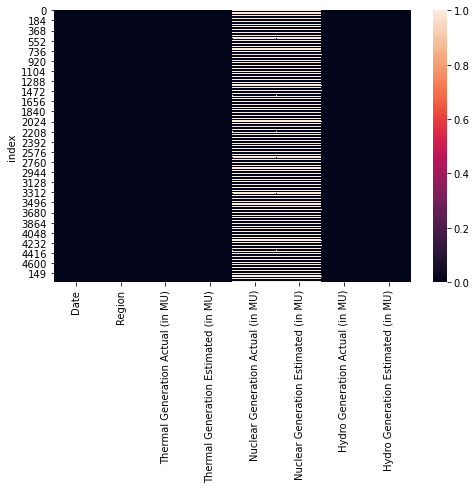

In [11]:
plt.figure(figsize=(8,5))
plt.show(sns.heatmap(power.isnull()))

In [12]:
power.Region.unique()

array(['Northern', 'Western', 'Southern', 'Eastern', 'NorthEastern'],
      dtype=object)

## Correlation between different features

In [13]:
a=power.corr() 
a

,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU)
Thermal Generation Actual (in MU),1.000000,0.980072,-0.419748,-0.294428,0.136598,0.145290
Thermal Generation Estimated (in MU),0.980072,1.000000,-0.438368,-0.337708,0.102277,0.092564
Nuclear Generation Actual (in MU),-0.419748,-0.438368,1.000000,0.537841,-0.206886,-0.168583
Nuclear Generation Estimated (in MU),-0.294428,-0.337708,0.537841,1.000000,-0.164848,-0.136418
Hydro Generation Actual (in MU),0.136598,0.102277,-0.206886,-0.164848,1.000000,0.960589
Hydro Generation Estimated (in MU),0.145290,0.092564,-0.168583,-0.136418,0.960589,1.000000


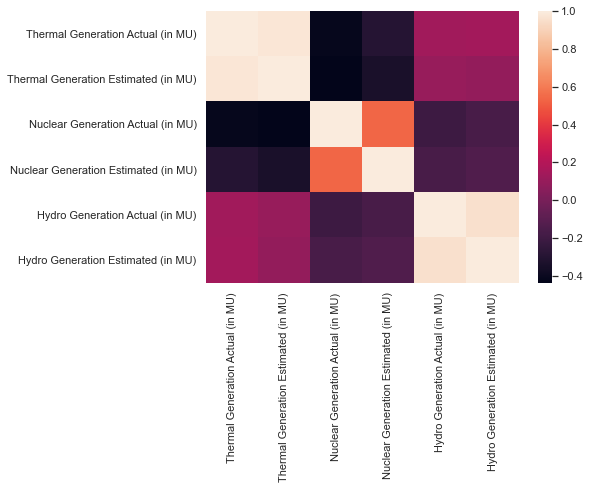

In [14]:
sns.set(rc={'figure.figsize':(7,5)})
sns.heatmap(a)

## Line-Graphs showing Estimated vs. Actual power generation for different Energy types

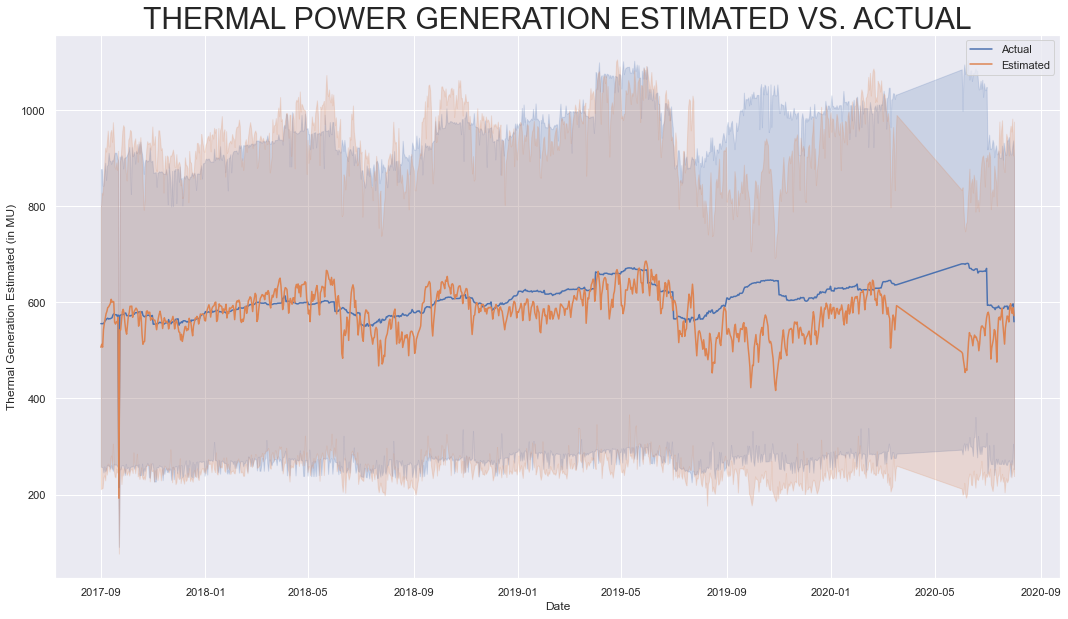

In [35]:
sns.set(rc={'figure.figsize':(18,10)})
sns.lineplot(x=power['Date'],y=power['Thermal Generation Actual (in MU)'],label='Actual').set_title('THERMAL POWER GENERATION ESTIMATED VS. ACTUAL',fontsize=30)
sns.lineplot(x=power['Date'],y=power['Thermal Generation Estimated (in MU)'],label='Estimated')
plt.show()

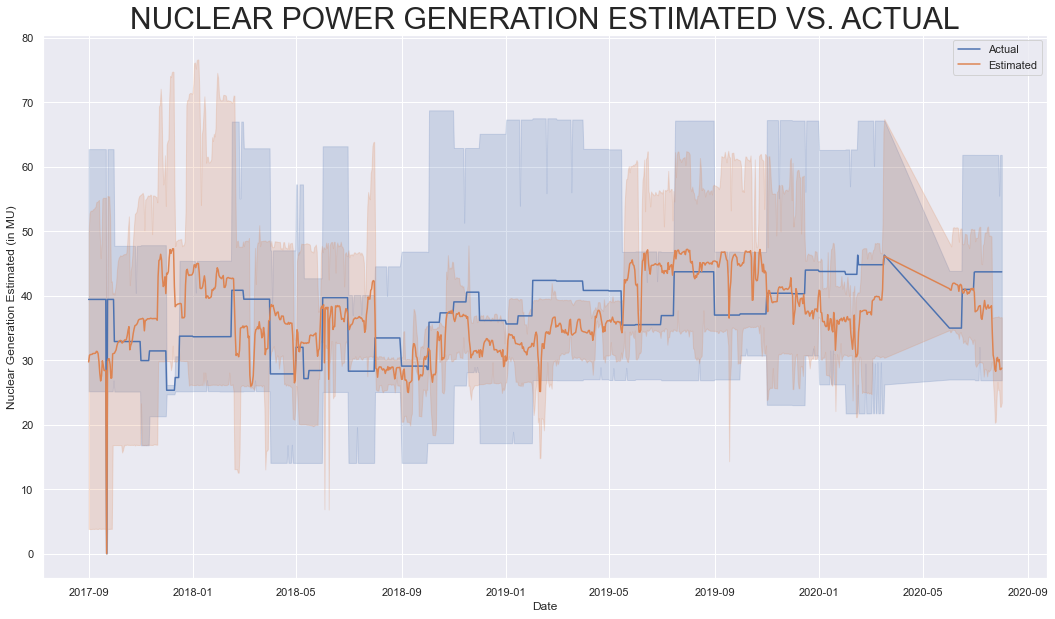

In [36]:
sns.set(rc={'figure.figsize':(18,10)})
sns.lineplot(x=power['Date'],y=power['Nuclear Generation Actual (in MU)'],label='Actual').set_title('NUCLEAR POWER GENERATION ESTIMATED VS. ACTUAL',fontsize=30)
sns.lineplot(x=power['Date'],y=power['Nuclear Generation Estimated (in MU)'],label='Estimated')
plt.show()

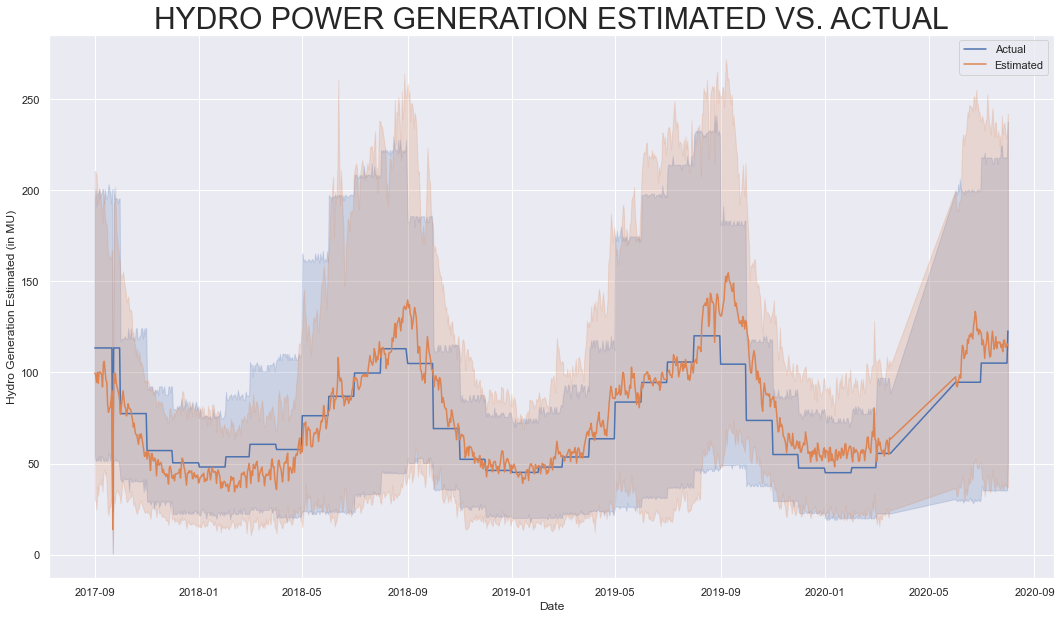

In [37]:
sns.set(rc={'figure.figsize':(18,10)})
sns.lineplot(x=power['Date'],y=power['Hydro Generation Actual (in MU)'],label='Actual').set_title('HYDRO POWER GENERATION ESTIMATED VS. ACTUAL',fontsize=30)
sns.lineplot(x=power['Date'],y=power['Hydro Generation Estimated (in MU)'],label='Estimated')
plt.show()

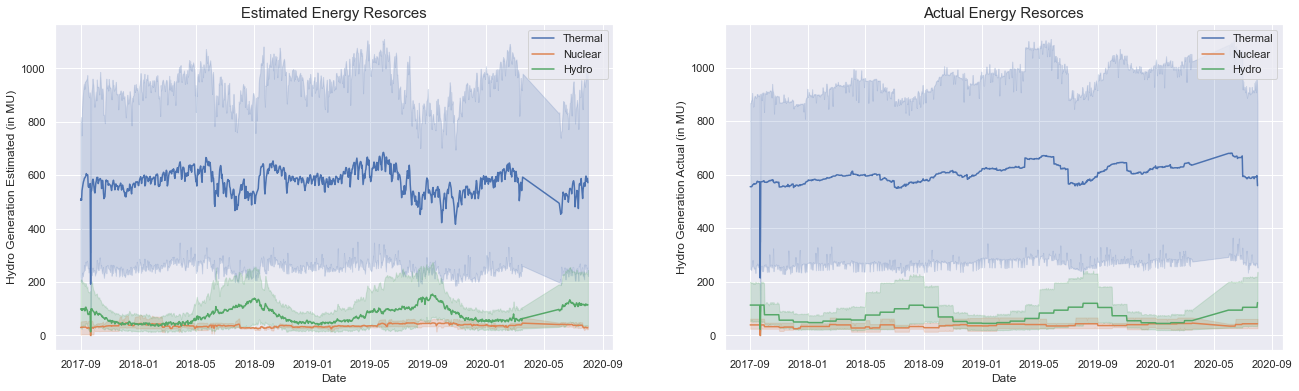

In [39]:
plt.figure(figsize=(22, 6))

ax1 = plt.subplot(1,2,2)
ax1 = sns.lineplot(data=power, x='Date', y='Thermal Generation Actual (in MU)', label='Thermal')
ax1 = sns.lineplot(data=power, x='Date', y='Nuclear Generation Actual (in MU)', label='Nuclear')
ax1 = sns.lineplot(data=power, x='Date', y='Hydro Generation Actual (in MU)', label='Hydro')
plt.title('Actual Energy Resorces',fontdict = {'fontsize' : 15})

ax2 = plt.subplot(1,2,1)
ax2 = sns.lineplot(data=power, x='Date', y='Thermal Generation Estimated (in MU)', label='Thermal')
ax2 = sns.lineplot(data=power, x='Date', y='Nuclear Generation Estimated (in MU)', label='Nuclear')
ax2 = sns.lineplot(data=power, x='Date', y='Hydro Generation Estimated (in MU)', label='Hydro')
plt.title('Estimated Energy Resorces',fontdict = {'fontsize' : 15})

plt.show()

## Calculating total Actual and Estimated Powers

In [19]:
power['Total Actual Power']=power['Thermal Generation Actual (in MU)']+power['Nuclear Generation Actual (in MU)']+power['Hydro Generation Actual (in MU)']
power['Total Estimated Power']=power['Thermal Generation Estimated (in MU)']+power['Nuclear Generation Estimated (in MU)']+power['Hydro Generation Estimated (in MU)']

In [20]:
power.head()

,Date,Region,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU),Total Actual Power,Total Estimated Power
index,,,,,,,,,,
0,2017-09-01,Northern,624.23,484.21,30.36,35.57,273.27,320.81,927.86,840.59
1,2017-09-01,Western,1106.89,1024.33,25.17,3.81,72.00,21.53,1204.06,1049.67
2,2017-09-01,Southern,576.66,578.55,62.73,49.80,111.57,64.78,750.96,693.13
3,2017-09-01,Eastern,441.02,429.39,NaN,NaN,85.94,69.36,NaN,NaN
4,2017-09-01,NorthEastern,29.11,15.91,NaN,NaN,24.64,21.21,NaN,NaN


## Power Generation by Region (Estimated Vs. Actual)

- Since values of Eastern and North-Eastern Region of Nuclear Energy are missing, these are not shown on the graph. 

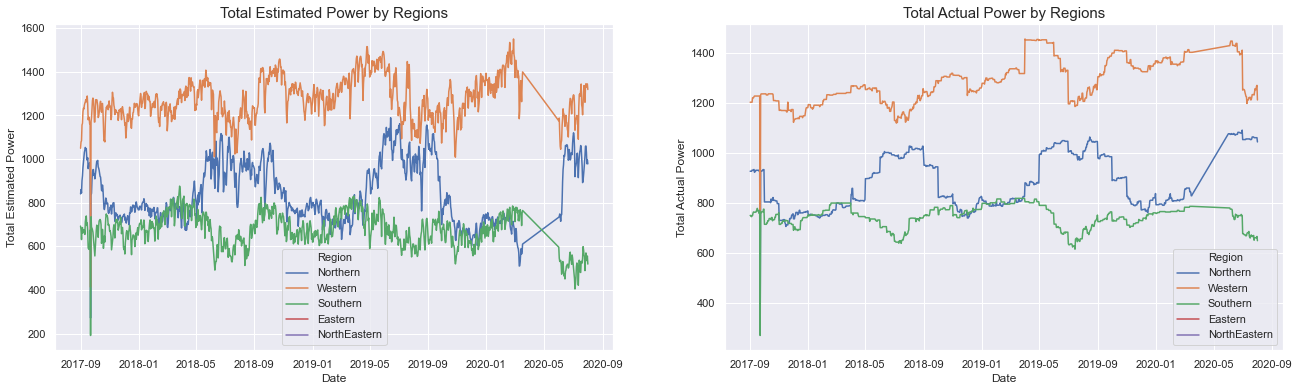

In [41]:
plt.figure(figsize=(22, 6))

ax1 = plt.subplot(1,2,2)
ax1 = sns.lineplot(data=power, x='Date', y='Total Actual Power', hue='Region')
plt.title('Total Actual Power by Regions',fontdict = {'fontsize' : 15})

ax1 = plt.subplot(1,2,1)
ax1 = sns.lineplot(data=power, x='Date', y='Total Estimated Power', hue='Region')
plt.title('Total Estimated Power by Regions',fontdict = {'fontsize' : 15})

plt.show()

## Calculating Power Generation grouped by Month

In [47]:
power_month = power[['Date','Total Actual Power','Total Estimated Power']]
power_month['Month']=power_month['Date'].dt.month
power_month

,Date,Total Actual Power,Total Estimated Power,Month
index,,,,
0,2017-09-01,927.86,840.59,9
1,2017-09-01,1204.06,1049.67,9
2,2017-09-01,750.96,693.13,9
3,2017-09-01,NaN,NaN,9
4,2017-09-01,NaN,NaN,9
...,...,...,...,...
305,2020-08-01,1045.07,978.35,8
306,2020-08-01,1213.04,1319.01,8
307,2020-08-01,649.98,519.06,8


In [48]:
power_month['Month'] = power_month['Month'].apply(lambda x: calendar.month_abbr[int(x)])

In [24]:
power_month

,Date,Total Actual Power,Total Estimated Power,Month
index,,,,
0,2017-09-01,927.86,840.59,Sep
1,2017-09-01,1204.06,1049.67,Sep
2,2017-09-01,750.96,693.13,Sep
3,2017-09-01,NaN,NaN,Sep
4,2017-09-01,NaN,NaN,Sep
...,...,...,...,...
305,2020-08-01,1045.07,978.35,Aug
306,2020-08-01,1213.04,1319.01,Aug
307,2020-08-01,649.98,519.06,Aug


In [25]:
power_month = power_month.groupby('Month').agg('sum')
power_month.reset_index(inplace=True)
power_month

,Month,Total Actual Power,Total Estimated Power
0,Apr,179259.83,175757.74
1,Aug,184335.75,174491.72
2,Dec,257579.29,245946.54
3,Feb,244180.77,235167.70
4,Jan,264174.16,253265.21
5,Jul,266580.78,258204.21
6,Jun,277088.54,257239.02
7,Mar,231221.55,221038.07
8,May,190415.28,188028.64
9,Nov,249830.98,239306.46


In [26]:
power_month['Month'] = pd.Categorical(power_month.Month,categories=calendar.month_abbr[1:], ordered=True)
power_month=power_month.sort_values('Month')
power_month.reset_index(drop=True, inplace=True)
power_month

,Month,Total Actual Power,Total Estimated Power
0,Jan,264174.16,253265.21
1,Feb,244180.77,235167.70
2,Mar,231221.55,221038.07
3,Apr,179259.83,175757.74
4,May,190415.28,188028.64
5,Jun,277088.54,257239.02
6,Jul,266580.78,258204.21
7,Aug,184335.75,174491.72
8,Sep,266889.84,258887.11
9,Oct,267573.17,259269.91


## Month-wise Estimated Vs. Actual Power Generation

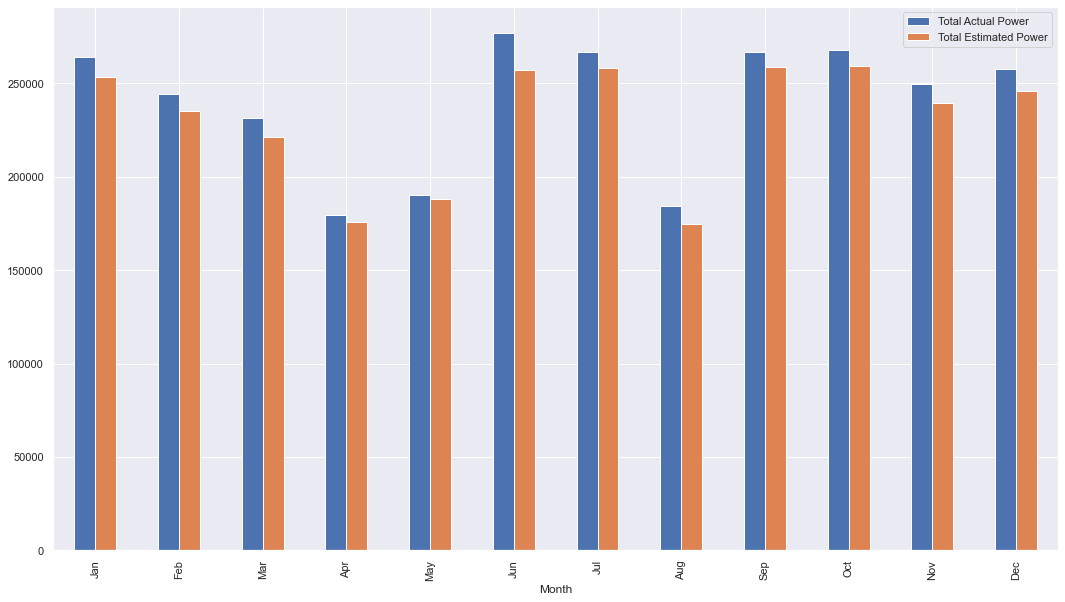

In [44]:
power_month.plot(kind='bar',x='Month',y=['Total Actual Power','Total Estimated Power'])

In [28]:
state_region.head()

,State / Union territory (UT),Area (km2),Region,National Share (%)
0,Rajasthan,342239,Northern,10.55
1,Madhya Pradesh,308350,Central,9.37
2,Maharashtra,307713,Western,9.36
3,Uttar Pradesh,240928,Northern,7.33
4,Gujarat,196024,Western,5.96


In [29]:
state_region

,State / Union territory (UT),Area (km2),Region,National Share (%)
0,Rajasthan,342239,Northern,10.550
1,Madhya Pradesh,308350,Central,9.370
2,Maharashtra,307713,Western,9.360
3,Uttar Pradesh,240928,Northern,7.330
4,Gujarat,196024,Western,5.960
5,Karnataka,191791,Southern,5.830
6,Andhra Pradesh,162970,Southern,4.870
7,Odisha,155707,Eastern,4.730
8,Chhattisgarh,135191,Central,4.110
9,Tamil Nadu,130058,Southern,3.950


# State-wise Distribution of National-Share

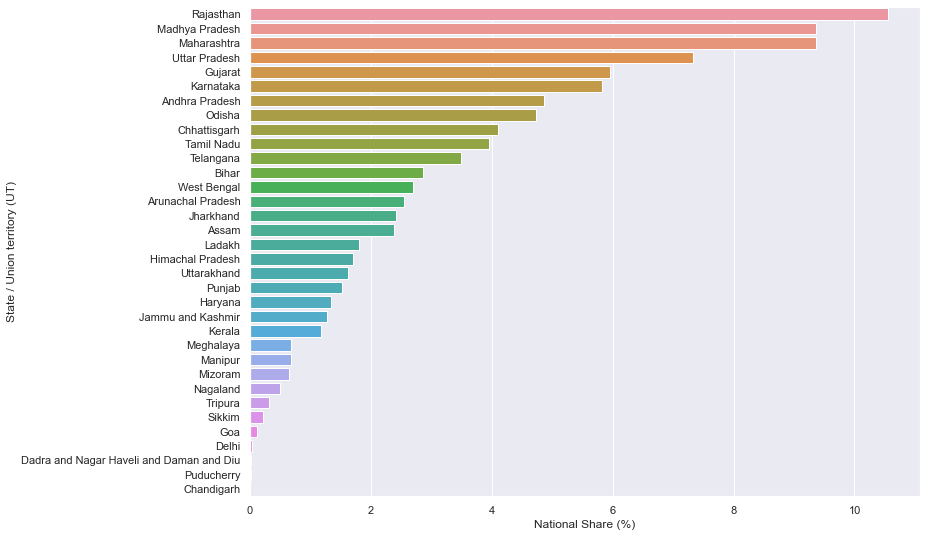

In [30]:
sns.set(rc={'figure.figsize':(12,9)})
sns.barplot(x='National Share (%)',y='State / Union territory (UT)',data=state_region)
plt.show()

## Region-wise distribution of Area

In [31]:
regions = state_region.groupby('Region').agg('sum')
regions = regions.reset_index()
regions

,Region,Area (km2),National Share (%)
0,Central,443541,13.480
1,Eastern,418336,12.710
2,Northeastern,262179,7.940
3,Northern,889881,27.193
4,Southern,636251,19.330
5,Western,508042,15.440


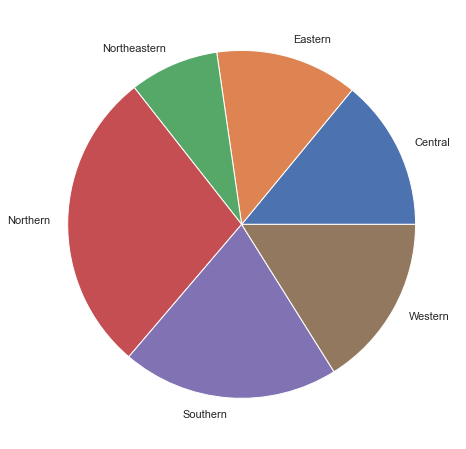

In [32]:
fig = plt.figure(figsize =(12, 8))
plt.pie(regions['Area (km2)'], labels = regions['Region'])
plt.show() 

## Region-wise Distribution of National Share

[Text(0, 0.5, 'National Share')]

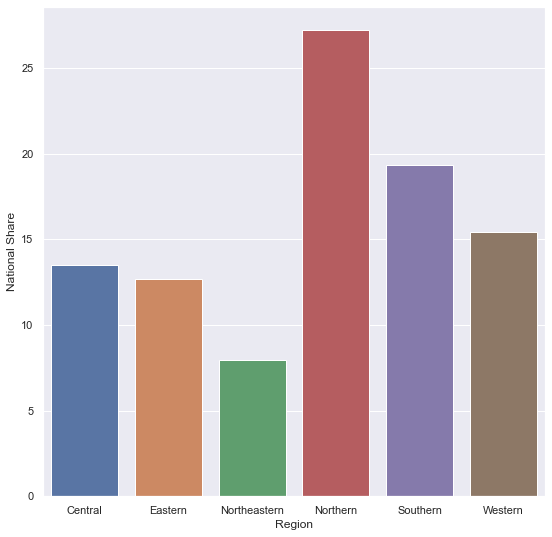

In [33]:
sns.set(rc={'figure.figsize':(9,9)})
ax= sns.barplot(x='Region',y='National Share (%)',data=regions)
ax.set(ylabel = "National Share")

Following graph shows a linear relationship between the National Share and Area of a State.

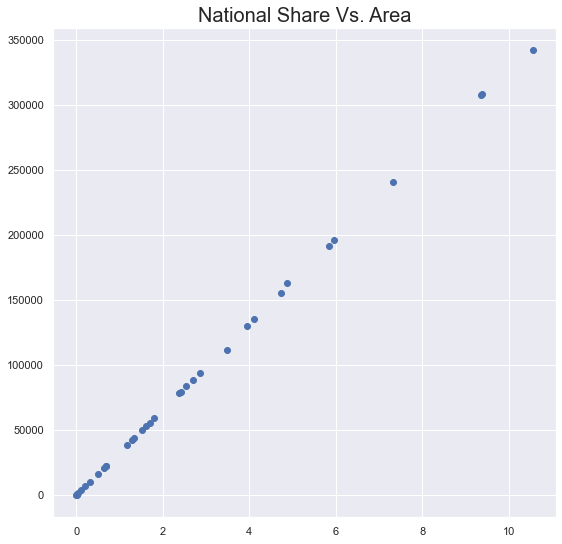

In [34]:
plt.scatter(state_region['National Share (%)'],state_region['Area (km2)'])
plt.title('National Share Vs. Area',fontsize=20)
plt.show()